# Л1: Создание OCR ИИ-агента. Ollama + Gradio

**OCR (Optical Character Recognition, оптическое распознавание символов)** —  технология, которая преобразует изображения текста в редактируемый формат. Её используют для обработки сканированных документов, фотографий или неструктурированных PDF-файлов.

## 1/ Подготовка среды выполнения

***Примечание.*** Эти шаги необходимо выполнить, если вы выпорлняете работу локально на компьютере. Если используется онлайн платформу, такую как Google Colab, то пропускаете этот этап.

На данной этапе вам наобходимо подготовить виртуальное окружение и установить все необходимые библиотеки.

### Создать и активировать (или только активировать, если ранне создавали) виртуальной окружение `python`.

Создайте на диске свою раюочую папку. Откройте терминал и перейдите в свою рабочую директорию
```
cd path/to/your/workspace
```
Далее создаем виртуальное окружение с помощью `python-venv`
```
python -m venv env
```
*активируем виртуальное окружение*
для Windows:
```
env\Scripts\activate
```
для Linux
```
source env/bin/activate
```

**Примечание.** `env` - это название вашего виртуального окружения, назвать его можете как угодно.

После этого можем выбрать наш локальный интерпрететор pyhton, нажав на кнопку выше "Select kernel".

### Устанавливаем все необходимые библиотеки

**Примечание.** Библиотеки установятся внутрь вашего виртуального окружения.

Библиотека Gradio для создания web-приложения.
```
pip install gradio
```

Клиентская библиотека Ollama для Python
```
pip install ollama
```

## 2/ Подготовка LLM

В данной работе используется запуск LLM на локальной инфраструктуре через платформу **Ollama** 
- сайт: https://ollama.com/
- документация: https://docs.ollama.com/
- список моделей: https://ollama.com/search
- клиентская библиотека для Python: https://github.com/ollama/ollama-python

Ollama обеспечивает развертывание и администрирование локальных LLM. В качестве локальных моделей используются легкие LLM с небольшим числом параметров. Для запуска более мощных моделей Ollama также предоставляет доступ к облачным моделям

### Установка Ollama
Для Windows скачайте установщик. Чтобы устанваливать без прав администратора, не включайте опцию установки для всех пользователей.

---

ℹ️*Примечание*. Если вы работатете в Goggle Colab, предоставленная вам рабочая среды является Linux средой. Можно зайти в терминал установить в текующую рабочую сессию Ollama путем ввода слеующей команды (https://docs.ollama.com/linux):
```bash
curl -fsSL https://ollama.com/install.sh | sh
```
---

### Запуск Ollama
Для Windows вместе в комплекте установки Ollama идет графический интерфейс, через который можно загружать и запускать локальные LLM.

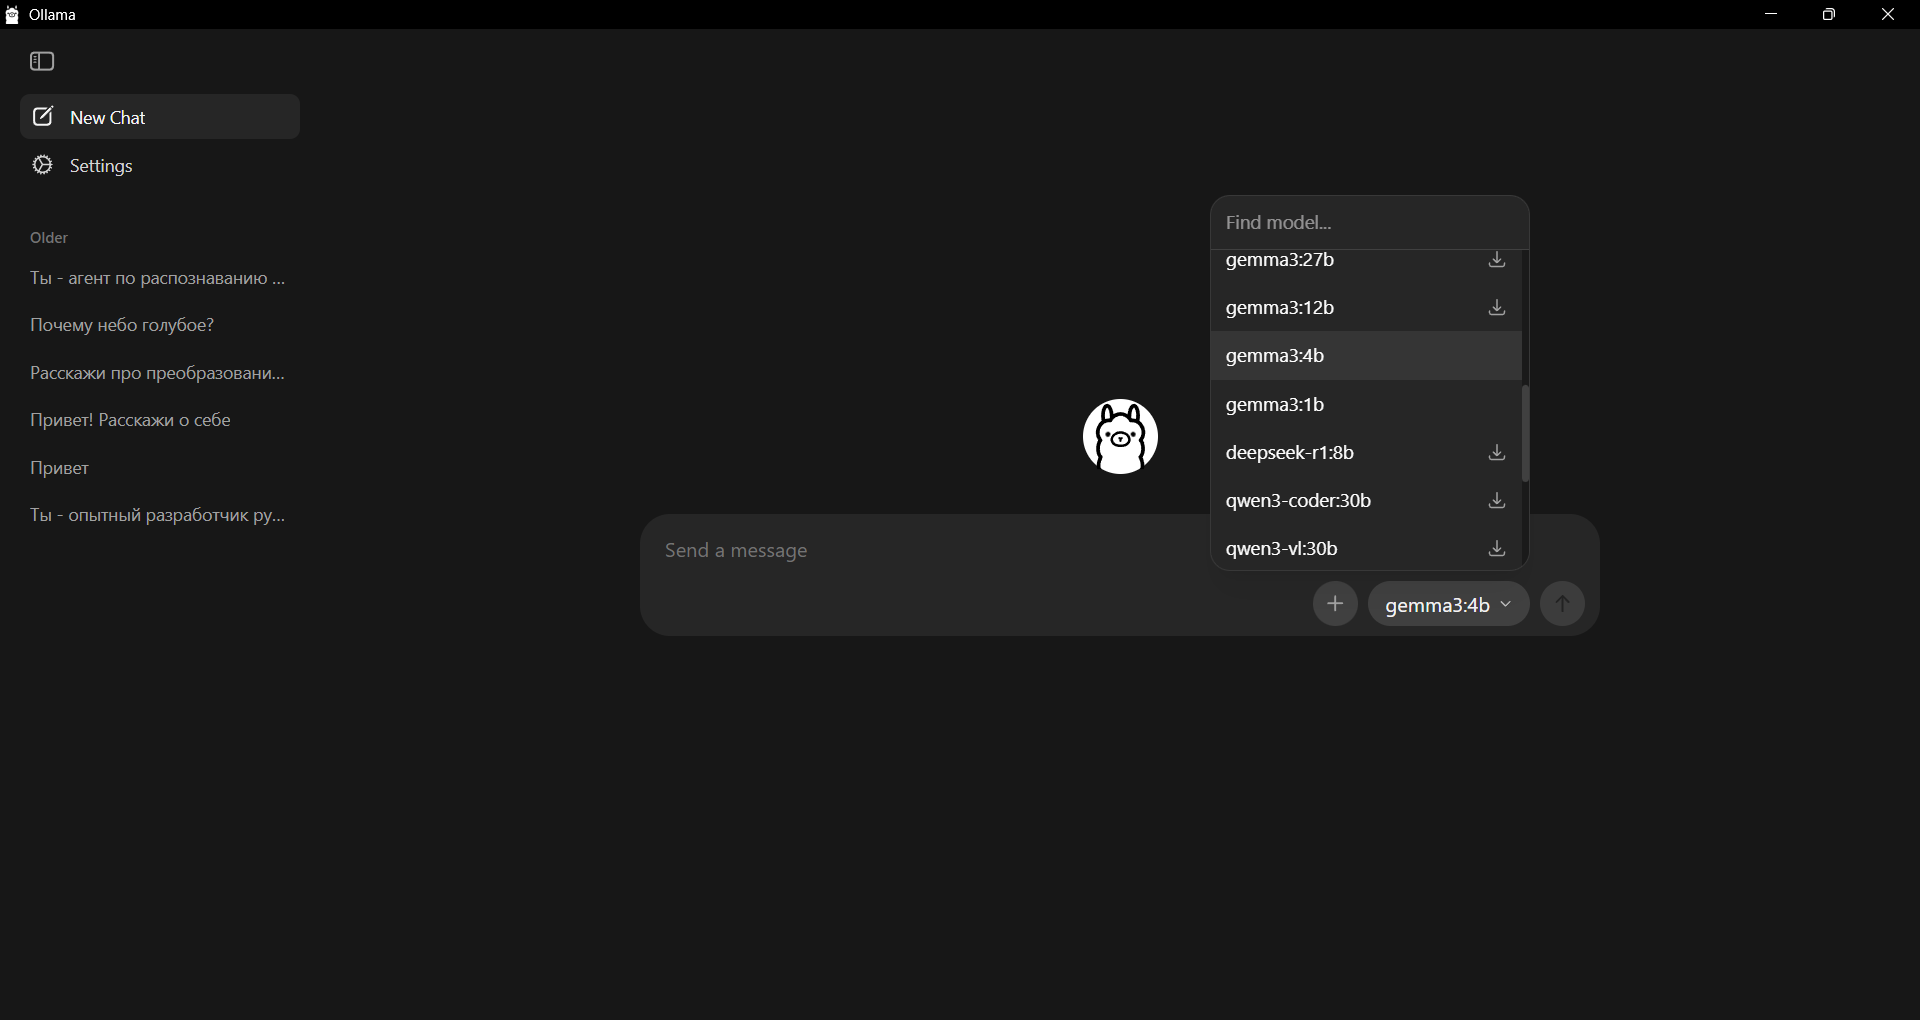

### Работа через CLI

CLI интерфейс Ollama позволяет также зазгружать, запускать и администрировать LLM. Рассмотрим основные команды (https://docs.ollama.com/cli):

* Вывод списка загруженных моделей
```bash
ollama list
```

* Загрузка модели
```bash
ollama pull gemma3:4b
```
В данном примере мы вводим команду загрузки open source модели Gemma от Google с 4 млрд. числом параметров

* Удаление модели
```bash
ollama rm gemma3:4b
```

* Запуск модели в терминале
```bash
ollama run gemma3:1b
```
В ответ получим приглашение на ввод сообщения к модели. Пример на скриншоте ниже:
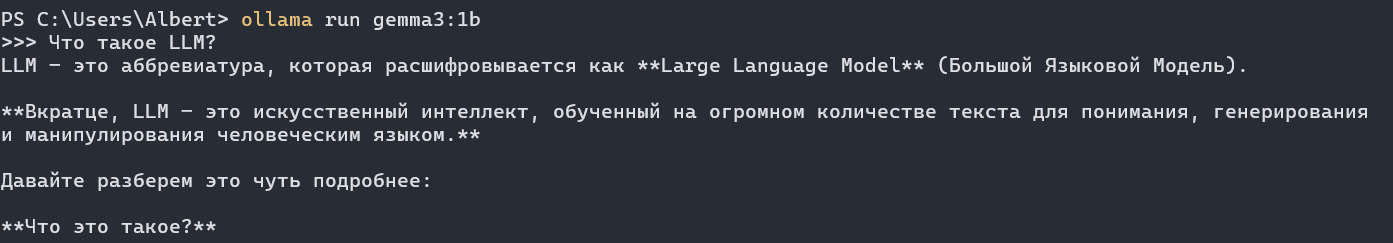

---
ℹ️*Примечание*. В Google Colab необходимо вручную запустить Ollama service через команду в терминале:
```bash
ollama serve
```
После этого терминал будет занят и последюущие команды следует вводить в Notebook с префикосом `!`. Тогда команда выполнятся как системная, например:
```
!ollama list
```
---

## 3/ Клиентская библиотека Python

Платформа Ollama предоставляет API к запущенным моделям. Взаимодействовать с LLM можно в том числе через клиентскую библиотеку для python `ollama-python` (https://github.com/ollama/ollama-python). Установите ее если еще этого не сделали.
```bash
pip install ollama
```
*В Google Colab*:
```
!pip install ollama
```

Ниже представлен простой пример с Github отправки сообщения к LLM:

```python
from ollama import chat

response = chat(model='gemma3:4b', messages=[
  {
    'role': 'user',
    'content': 'Дай определение LLM',
  },
])
# print(response['message']['content'])
# or access fields directly from the response object
print(response.message.content)
```

Здесь используется модель `gemma3:4b`. Загрузите ее `ollama pull gemma3:4b` прежде чем запускать данный пример.

В данном примере сначала создается запрос к LLM через функцию `chat`, при вызове которой мы указываем модель `gemma3:4b` и перелаем список сообщений. Сообщения имеют известную нам по предыдущим лабораторным работам структуру словаря: 
- поле `'role'` содержит отправителя (мы - `'user'`)
- поле `'content'` содержит промпт

Вызов модели и получение ответа происходит в момент обращения к `response`. Ответ `content` можно извлечь как из словаря
```python
response['message']['content']
```
или через обращение к полям объекта
```python
response.message.content
```

## 4/ Описание агента для задачи OCR

Мы создаем ИИ-агента который выполняет функцию OCR (Optical Character Recognition, оптическое распознавание символов) для отсканированных страниц старых учебников. На выходе мо должны получить форматированный в Markdown редактируемый текст. В учебниках помимо текста могу встречаться формулы таблицы - они тоже должны быть распознаны и отформатированы.

Ниже представлена схема такого агента:

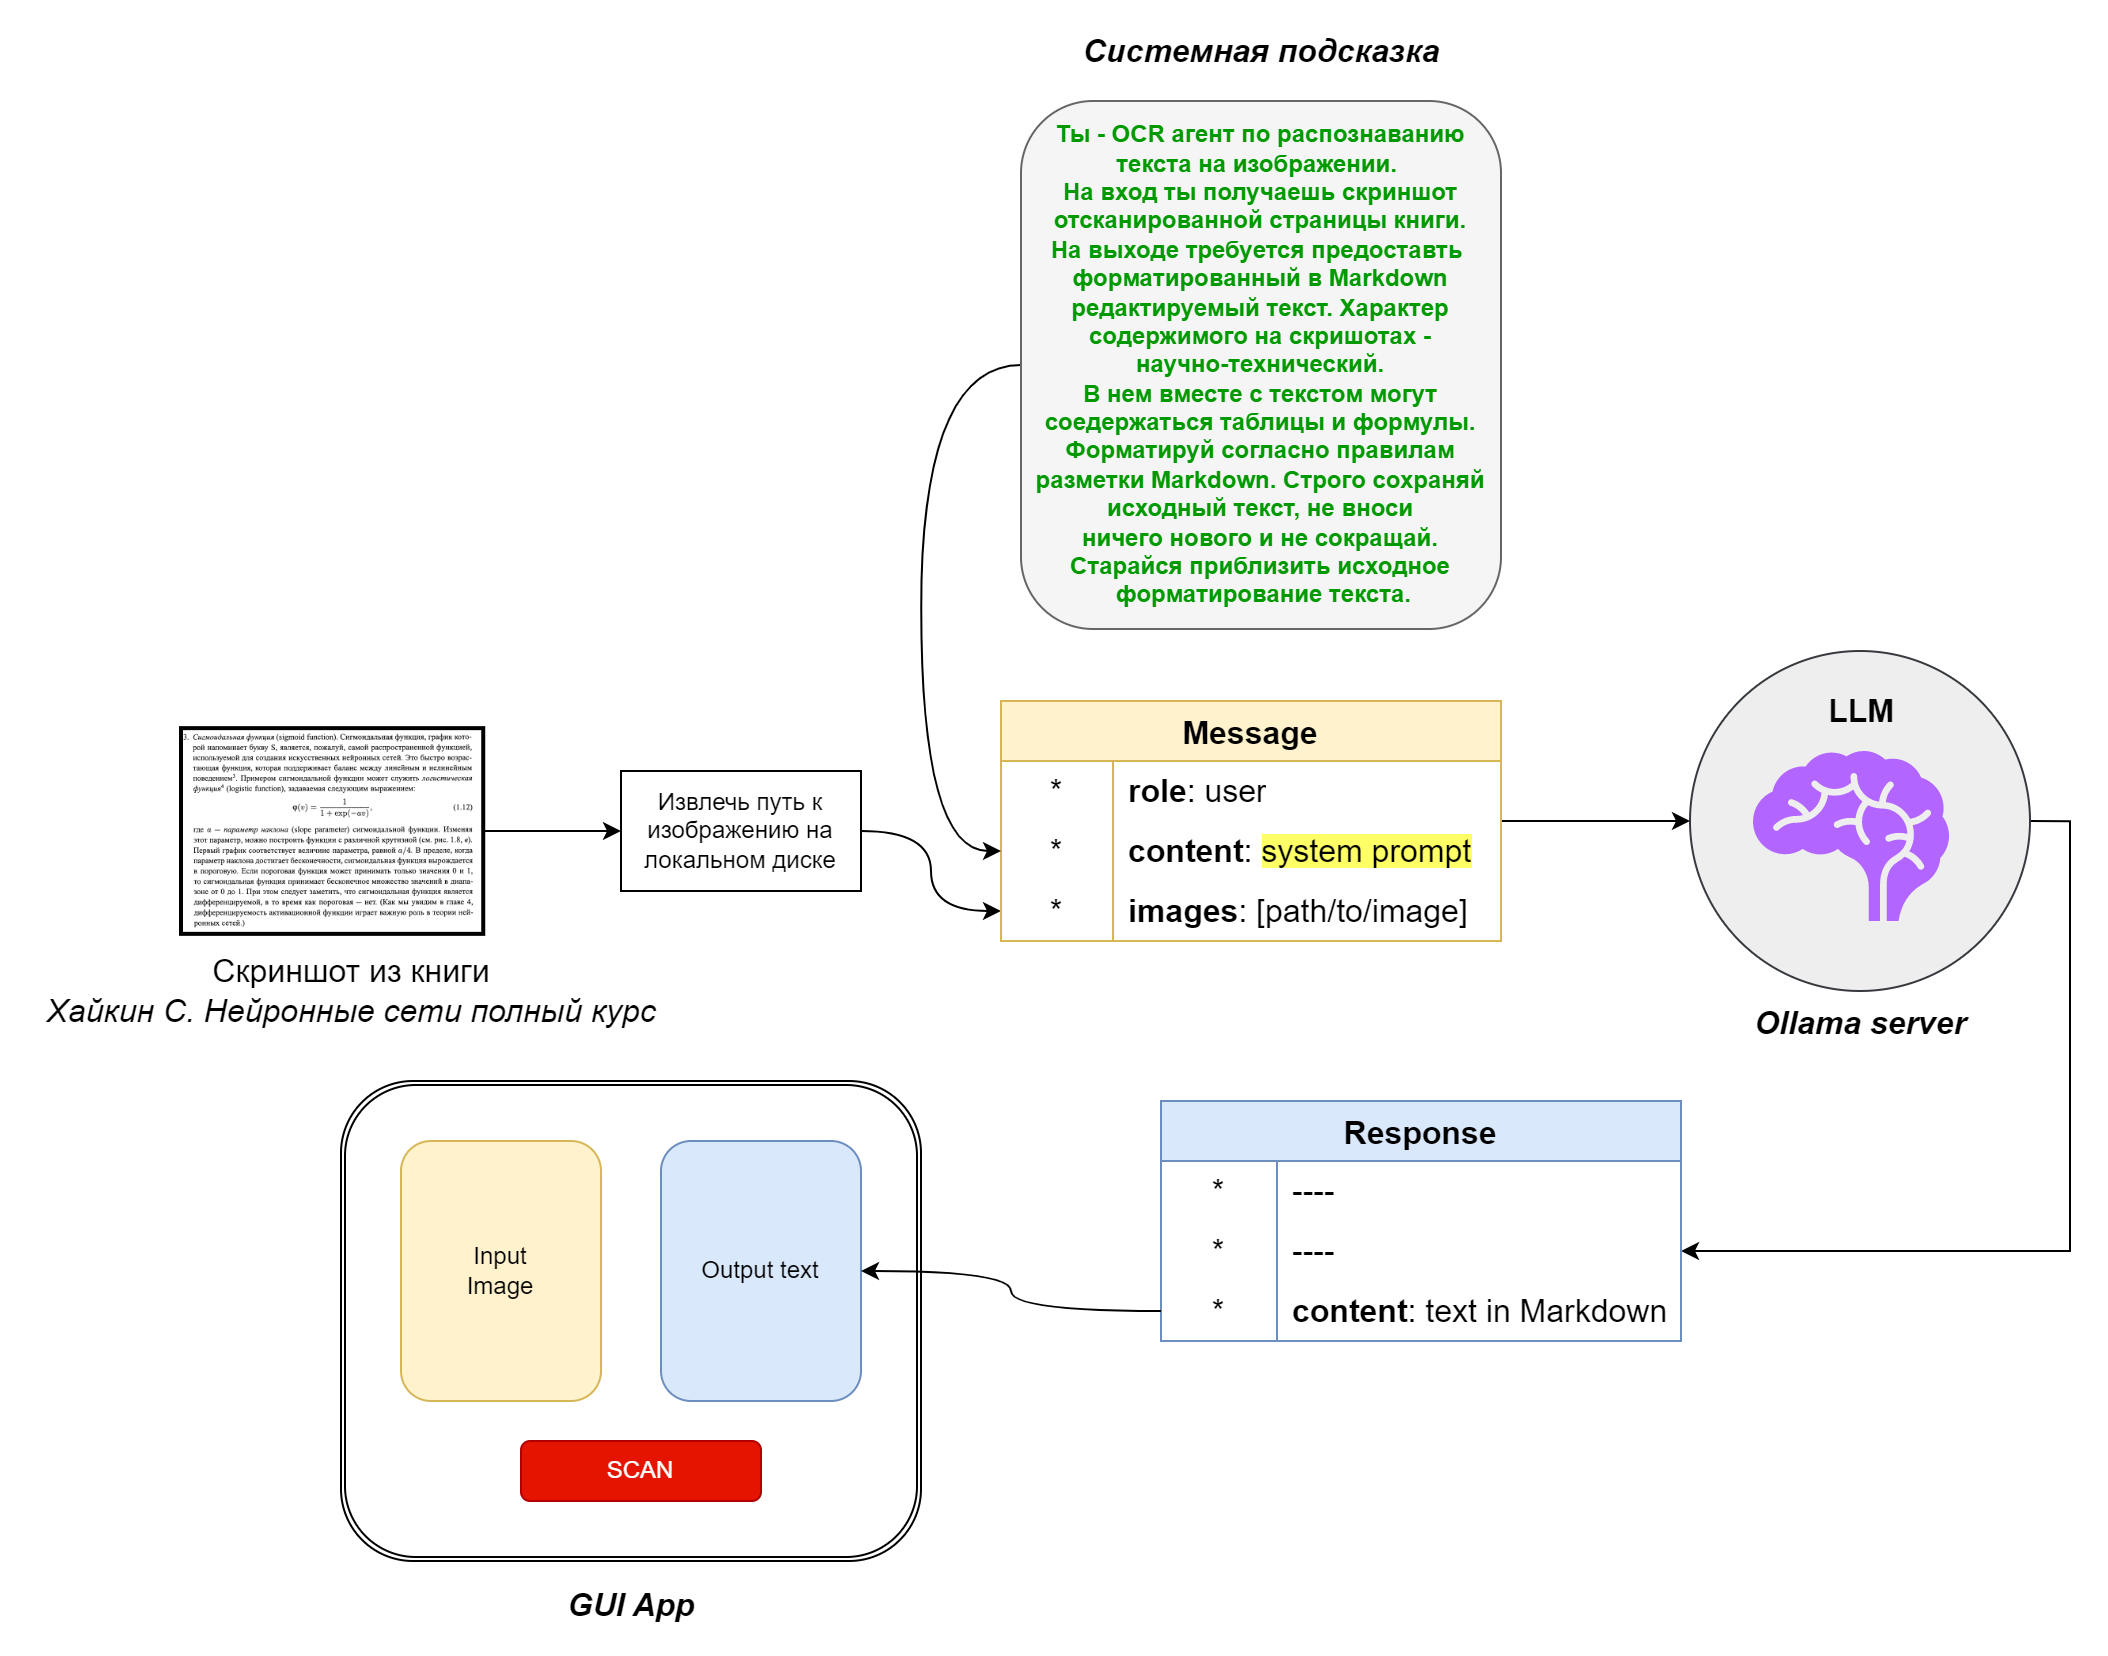

Например мы хотим оцифровать отрывок из книги о нейронных сетях. Скриншот мы вводим в нашем графическое приложение (Input Image). Ollama API поддерживает три способа передачи изображения:
1. Чере путь к файлу изображения или URL
2. В base64 кодировке
3. В бинарном формате
```python
# Путь к изображению
path = 'path/to/image'
# Также можно в base64 encoded image data
img = base64.b64encode(Path(path).read_bytes()).decode()
# Или в бинарном виде
img = Path(path).read_bytes()
```
Давайте в нашем приложении выберем **путь к изображению**.

Затем формируем сообщение, в структуру которого добавляется новое поле `images`, содержащее список всех изображений (в данном случае передаем один элемент - строку пути к файлу). 
```python
response = chat(
  model='gemma3:4b',
  messages=[
    {
      'role': 'user',
      'content': system_prompt,
      'images': [path],
    }
  ],
)
```
Подробнее об использовании Ollama API в vision задачах в документации (https://docs.ollama.com/capabilities/vision). 
Работу с изображениями поддерживают не все модели, а только **Vision модели**. Модели Vision принимают изображения наряду с текстом, чтобы модель могла описывать, классифицировать и отвечать на вопросы о том, что она видит.

К Vision моделям, доступным на Ollama на данный момент, можно отнести некоторые модели из семейства `gemma3` (https://ollama.com/library/gemma3) и `qwen3-vl` (https://ollama.com/library/qwen3-vl). Выбирайте варианты моделей, у которых вход *Text, image*.

Важным элементом в сообщении к LLM является системная подсказка (system prompt). Здесь необходимо применить так называемый prompt-инжиниринг - качественно составить системный промпт чтобы добиться нужного результата от модели. В нашем агенте системный промпт не зависит от входных данных и поэтому остается неизменным. В качестве базового примера предложен следующий промпт:

```python
system_prompt = """ Ты - OCR агент по распознаванию текста на изображении. На вход ты получаешь скриншот отсканированной страницы книги. На выходе требуется предоставть форматированный в Markdown редактируемый текст. Характер содержимого на скриншотах - научно-технический. В нем вместе с текстом могут соедержаться таблицы и формулы. Форматируй согласно правилам разметки Markdown. Строго сохраняй исходный текст, не вноси ничего нового и не сокращай. Старайся приблизить исходное форматирование текста.
"""
```

Далее отправляем сформированный запрос к LLM (конкретную модель выбираете вы, в качестве базового варианта можно взять `gemma3:4b`). Из ответа `response` извлекаем поле `content` - в нем содержиться распознанный текст в формате Markdown. 

Приложение с графическим интерфейсом создадим с помощью Gradio. Интерфейс должен содержать:
- входной блок для вставки изображения
- выходной блок для отображения текста в Markdown

Шаблок кода для интерфейса:
```python
demo = gr.Interface(
    fn=process,
    inputs = [gr.Image()],
    outputs = [gr.Markdown()],
    title = 'OCR AI-Agent'
)
```
- `fn=process` - указываем бэкенд-функцию, которая будет обрабатывать процесс (по нажатии на кнопку Submit). Эту функцию рассмотрим ниже.
- `inputs = [gr.Image()]` - перечислям все входные блоки, у нас один элемент `gr.Image()`
- `outputs = [gr.Markdown()]` - перечисляем все выходные блоки, в нашем случае это блок отображения текста с поддержкой Markdown
- `title = 'OCR AI-Agent'` - название нашего приложения

Рассмотрим бэкенд-функцию
```python
def process(imput_image):
    ...
    ...
    return ocr_text
```
Набор входных аргументов определяется числом и типом входных блоков. В нашем случае один аргумент - изображение.
Возвращать функция должна распознанный текст. В этой функции непосредственно выполняется пайплайн OCR-агента. Возвращает функция строку -  распознанный текст.

## **ЗАДАНИЕ 📝**
Вам небходимо написать реализацию OCR-агента на основе схемы, представленной выше. Основная логика агента выполняется в бэкенд-функции интерфейса Gradio. На выходе вы должны получить рабочее веб-приложение, для работы которого потребуется только вставка скриншота с текстом.

Рекоменудется использовать технологии, указанные в работе (Ollama, Gradio), но вы можете реализовать агента и с помощью других фреймворков, если таковыми владете.

Ниже представлен скриншот из книги Хайкин С. "Нейронные сети. Полный курс". Его вы можете взять в качестве примера входных данных для тестирования работы агента. В этом отрывке помимо текста есть также математические выражения, которые также должна распознать LLM.

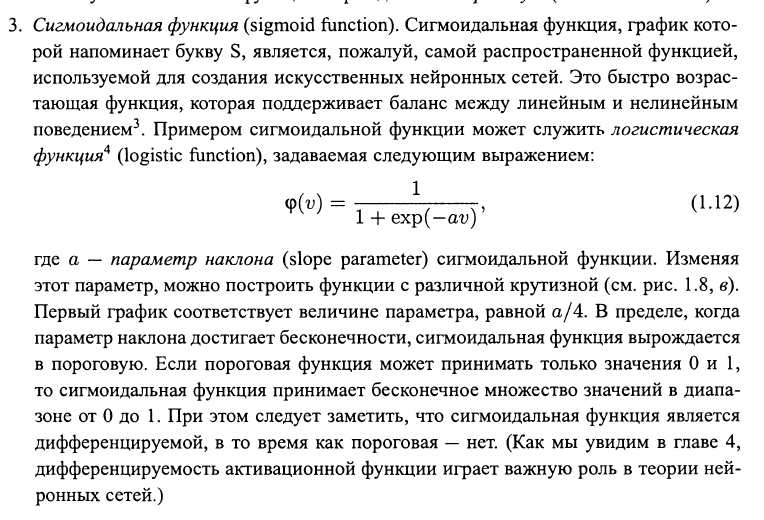

## Форма отчетности
В качестве отчета по лабораторной работе вам необходимо предоставить:
1. Файл с кодом вашего приложения (Python Script или Jupyter Nonebook)
2. Скриншот работы графического web-интерфейса вашего приложения

Отчет разместить на **moodle**